In [1]:
import numpy as np
import os
import tensorflow as tf
import cv2
import json
import matplotlib.pyplot as plt
import pandas as pd

print("Hello world.")

2025-12-16 13:55:33.705491: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765893333.922467      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765893333.987172      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Hello world.


In [2]:
import os
import json
import numpy as np
import cv2

def create_mask(json_file, image_shape):
    if json_file is None or not os.path.exists(json_file):
        return None
    try:
        with open(json_file, 'r') as f:
            data = json.load(f)
    except:
        return None
    if 'shapes' not in data or data['shapes'] is None:
        return None

    mask = np.zeros(image_shape[:2], dtype=np.uint8)

    try:
        for shape in data['shapes']:
            points = np.array(shape.get('points', []), dtype=np.int32)
            if len(points) > 2:
                cv2.fillPoly(mask, [points], 255)
    except:
        return None

    return mask


def find_image_file(base_name, image_path):
    """Find the correct image file (.jpg, .JPG, .jpeg, .JPEG, .png)"""
    exts = [".jpg", ".JPG", ".jpeg", ".JPEG", ".png"]
    for ext in exts:
        file_path = os.path.join(image_path, base_name + ext)
        if os.path.exists(file_path):
            return file_path
    return None

print("Hello world")

Hello world


In [3]:
train_images, valid_images, test_images  = [], [], []
train_masks, valid_masks, test_masks = [], [] , []
test_images_a, test_images_b, test_images_d = [], [], []
test_masks_a, test_masks_b, test_masks_d = [], [], []

image_path = "/kaggle/input/malabar-dataset/Malabar_Dataset_Original_Data/Malabar_Dataset/Anthracnose(102)"
json_path = "/kaggle/input/annotated-dataset-json-files-version-2/annotated_json_files/Anthracnose(102)/affected_region"
split_file = pd.read_csv("/kaggle/input/malabar-dataset/anthracnose_split.csv")


for i in range(0, len(split_file)):
    used_for = split_file.iloc[i]["used_for"]
    image_no = split_file.iloc[i]["image_no"]
    base_name = f"Anthracnose ({image_no})"

    json_file = os.path.join(json_path, base_name + ".json")

    # --- FIND REAL IMAGE FILE ---
    image_file = find_image_file(base_name, image_path)
    if image_file is None:
        print(f"Image missing: {base_name}")
        continue

    image = cv2.imread(image_file)
    if image is None:
        print(f"Failed to read: {image_file}")
        continue

    mask = create_mask(json_file, image.shape)
    if mask is None:
        print(f"Mask skipped: {json_file}")
        continue

    if used_for == "training":
        train_images.append(image)
        train_masks.append(mask)
    elif used_for == "validation":
        valid_images.append(image)
        valid_masks.append(mask)
    else:
        test_images.append(image)
        test_masks.append(mask)
        test_images_a.append(image)
        test_masks_a.append(mask)



print(len(train_images), len(train_masks))
print(len(valid_images), len(valid_masks))
print(len(test_images), len(test_masks))

80 80
10 10
12 12


In [4]:
image_path = "/kaggle/input/malabar-dataset/Malabar_Dataset_Original_Data/Malabar_Dataset/Bacterial-Spot(752)"
json_path = "/kaggle/input/annotated-dataset-json-files-version-2/annotated_json_files/Bacterial-Spot(752)/affected_region/Bacterial-Spot(752)"
split_file = pd.read_csv("/kaggle/input/malabar-dataset/bacterial_spot_split.csv")


for i in range(0, len(split_file)):
    used_for = split_file.iloc[i]["used_for"]
    image_no = split_file.iloc[i]["image_no"]
    base_name = f"Bacterial-Spot ({image_no})"

    json_file = os.path.join(json_path, base_name + ".json")

    # --- FIND REAL IMAGE FILE ---
    image_file = find_image_file(base_name, image_path)
    if image_file is None:
        print(f"Image missing: {base_name}")
        continue

    image = cv2.imread(image_file)
    if image is None:
        print(f"Failed to read: {image_file}")
        continue

    mask = create_mask(json_file, image.shape)
    if mask is None:
        print(f"Mask skipped: {json_file}")
        continue

    if used_for == "training":
        train_images.append(image)
        train_masks.append(mask)
    elif used_for == "validation":
        valid_images.append(image)
        valid_masks.append(mask)
    else:
        test_images.append(image)
        test_masks.append(mask)
        test_images_a.append(image)
        test_masks_a.append(mask)


#Bacterial-Spot (1).jpg

print(len(train_images), len(train_masks))
print(len(valid_images), len(valid_masks))
print(len(test_images), len(test_masks))

680 680
85 85
89 89


In [5]:
image_path = "/kaggle/input/malabar-dataset/Malabar_Dataset_Original_Data/Malabar_Dataset/Downy-Mildew(240)"
json_path = "/kaggle/input/annotated-dataset-json-files-version-2/annotated_json_files/Downy-Mildew(240)/affected_region"
split_file = pd.read_csv("/kaggle/input/malabar-dataset/downy_mildew_split.csv")


for i in range(0, len(split_file)):
    used_for = split_file.iloc[i]["used_for"]
    image_no = split_file.iloc[i]["image_no"]
    base_name = f"Downy-Mildew ({image_no})"

    json_file = os.path.join(json_path, base_name + ".json")

    # --- FIND REAL IMAGE FILE ---
    image_file = find_image_file(base_name, image_path)
    if image_file is None:
        print(f"Image missing: {base_name}")
        continue

    image = cv2.imread(image_file)
    if image is None:
        print(f"Failed to read: {image_file}")
        continue

    mask = create_mask(json_file, image.shape)
    if mask is None:
        print(f"Mask skipped: {json_file}")
        continue

    if used_for == "training":
        train_images.append(image)
        train_masks.append(mask)
    elif used_for == "validation":
        valid_images.append(image)
        valid_masks.append(mask)
    else:
        test_images.append(image)
        test_masks.append(mask)
        test_images_a.append(image)
        test_masks_a.append(mask)


#Bacterial-Spot (1).jpg

print(len(train_images), len(train_masks))
print(len(valid_images), len(valid_masks))
print(len(test_images), len(test_masks))

872 872
109 109
113 113


In [6]:
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, UpSampling2D,
    BatchNormalization, Activation, Add, Multiply, Concatenate
)
from tensorflow.keras.models import Model

In [7]:
def conv_block(x, filters):
    x = Conv2D(filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x


In [8]:
def attention_gate(g, x, inter_channels):
    """
    g: decoder feature map
    x: encoder feature map
    """

    g1 = Conv2D(inter_channels, 1, padding="same")(g)
    g1 = BatchNormalization()(g1)

    x1 = Conv2D(inter_channels, 1, padding="same")(x)
    x1 = BatchNormalization()(x1)

    psi = Add()([g1, x1])
    psi = Activation("relu")(psi)

    psi = Conv2D(1, 1, padding="same")(psi)
    psi = BatchNormalization()(psi)
    psi = Activation("sigmoid")(psi)

    return Multiply()([x, psi])


In [9]:
def Attention_UNet(input_shape=(256, 256, 3), n_classes=1):

    inputs = Input(input_shape)

    # Encoder
    c1 = conv_block(inputs, 64)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = conv_block(p1, 128)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = conv_block(p2, 256)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = conv_block(p3, 512)
    p4 = MaxPooling2D((2, 2))(c4)

    c5 = conv_block(p4, 1024)

    # Decoder
    u5 = UpSampling2D((2, 2))(c5)
    a4 = attention_gate(u5, c4, 256)
    u5 = Concatenate()([u5, a4])
    c6 = conv_block(u5, 512)

    u6 = UpSampling2D((2, 2))(c6)
    a3 = attention_gate(u6, c3, 128)
    u6 = Concatenate()([u6, a3])
    c7 = conv_block(u6, 256)

    u7 = UpSampling2D((2, 2))(c7)
    a2 = attention_gate(u7, c2, 64)
    u7 = Concatenate()([u7, a2])
    c8 = conv_block(u7, 128)

    u8 = UpSampling2D((2, 2))(c8)
    a1 = attention_gate(u8, c1, 32)
    u8 = Concatenate()([u8, a1])
    c9 = conv_block(u8, 64)

    # Output
    outputs = Conv2D(n_classes, 1, activation="sigmoid")(c9)

    return Model(inputs, outputs)


In [10]:
model = Attention_UNet(input_shape=(256, 256, 3), n_classes=1)
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model.summary()


I0000 00:00:1765893387.428084      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1765893387.428787      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │      1,024 │ conv2d_4[0][0]  

 Total params: 31,930,037 (121.80 MB)

 Trainable params: 31,916,333 (121.75 MB)

 Non-trainable params: 13,704 (53.53 KB)

In [11]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

# Preprocess images and masks
image_size = (256, 256)

def preprocess_data(images, masks):
    images_resized = [cv2.resize(img, image_size) for img in images]
    masks_resized = [cv2.resize(mask, image_size) for mask in masks]
    
    images_array = np.array(images_resized) / 255.0
    masks_array = np.array(masks_resized) / 255.0
    
    images_array = images_array.astype(np.float32)
    masks_array = masks_array.astype(np.float32)
    
    masks_array = np.expand_dims(masks_array, axis=-1)  # Ensure correct shape
    
    return images_array, masks_array

# Prepare datasets
X_train, y_train = preprocess_data(train_images, train_masks)
X_valid, y_valid = preprocess_data(valid_images, valid_masks)
X_test, y_test = preprocess_data(test_images, test_masks)
#X_test_a, y_test_a = preprocess_data(test_images_a, test_masks_a)
#X_test_b, y_test_b = preprocess_data(test_images_b, test_masks_b)

# Callbacks
checkpoint = ModelCheckpoint("attention_Unet_semi_final_best_model.keras", monitor="val_accuracy", save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor="val_accuracy", patience=40, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,
    batch_size=8,
    callbacks=[checkpoint, early_stopping]
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/50


I0000 00:00:1765893411.332544     111 service.cc:148] XLA service 0x78376c00ec30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765893411.333689     111 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1765893411.333718     111 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1765893413.918115     111 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1765893474.426567     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.8928 - loss: 0.3397
Epoch 1: val_accuracy improved from -inf to 0.99214, saving model to attention_Unet_semi_final_best_model.keras
109/109 ━━━━━━━━━━━━━━━━━━━━ 173s 845ms/step - accuracy: 0.8935 - loss: 0.3382 - val_accuracy: 0.9921 - val_loss: 0.1215
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.9917 - loss: 0.0639
Epoch 2: val_accuracy did not improve from 0.99214
109/109 ━━━━━━━━━━━━━━━━━━━━ 73s 672ms/step - accuracy: 0.9917 - loss: 0.0639 - val_accuracy: 0.9921 - val_loss: 0.0478
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.9923 - loss: 0.0372
Epoch 3: val_accuracy did not improve from 0.99214
109/109 ━━━━━━━━━━━━━━━━━━━━ 73s 674ms/step - accuracy: 0.9923 - loss: 0.0372 - val_accuracy: 0.9921 - val_loss: 0.0408
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.9918 - loss: 0.0319
Epoch 4: val_accuracy improved from 0.99214 to 0.99236, saving model to attention_Un

2025-12-16 15:00:28.997824: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng11{k2=1,k3=0} for conv (f32[32,64,256,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,192,256,256]{3,2,1,0}, f32[64,192,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-12-16 15:00:29.244397: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.246668605s
Trying algorithm eng11{k2=1,k3=0} for conv (f32[32,64,256,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,192,256,256]{3,2,1,0}, f32[64,192,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivat

4/4 ━━━━━━━━━━━━━━━━━━━━ 80s 11s/step - accuracy: 0.9933 - loss: 0.0163
Test Loss: 0.0142, Test Accuracy: 0.9941


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step  


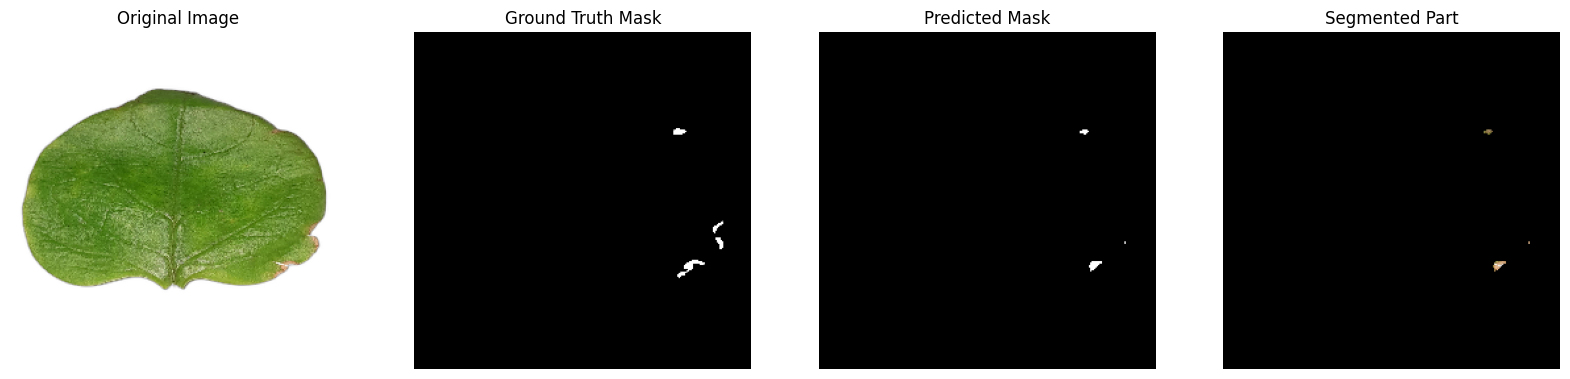

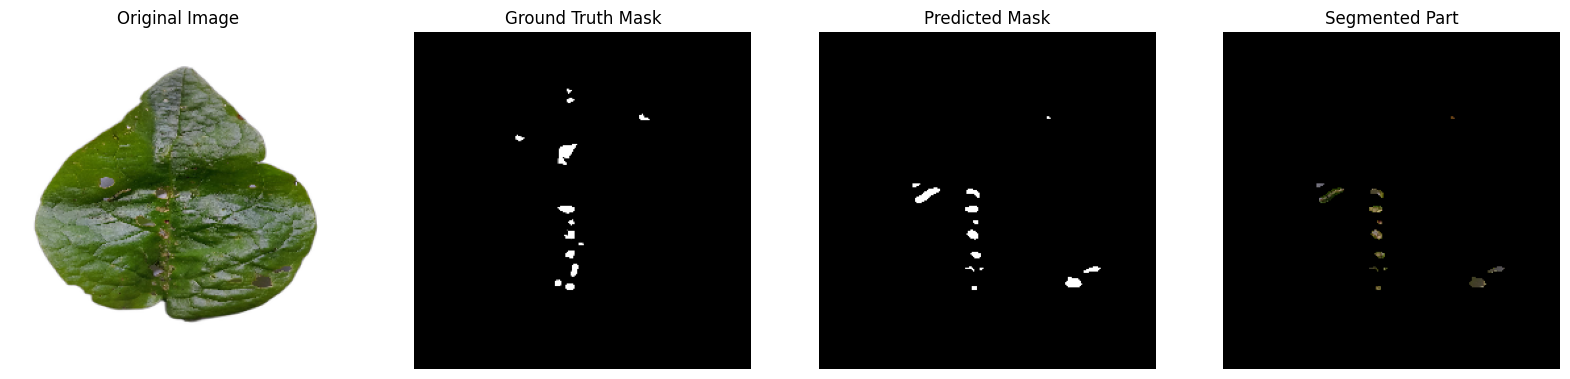

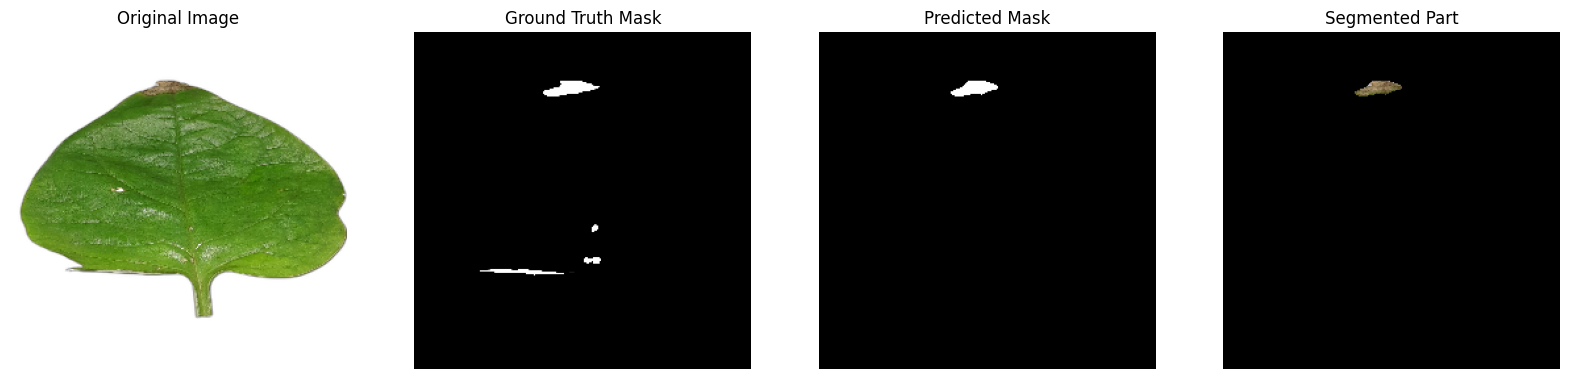

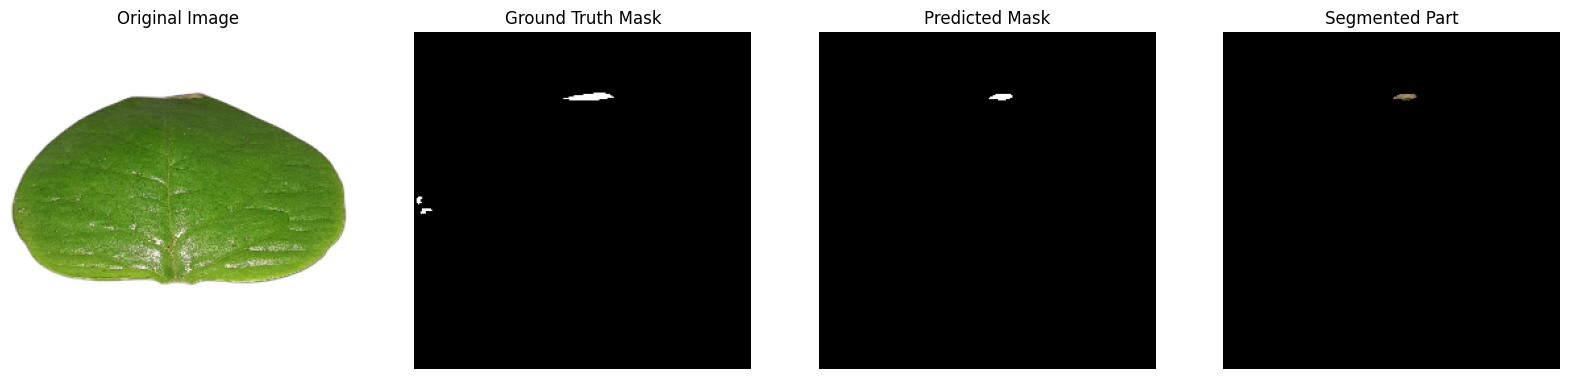

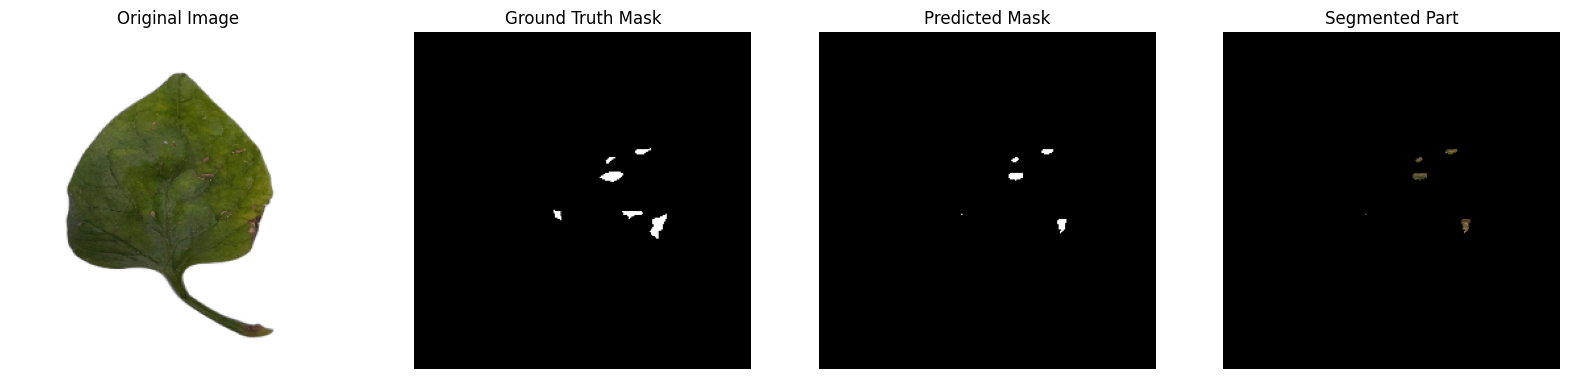

In [12]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

# Prediction and Mask Creation
def create_mask(predictions):
    # Convert predictions to binary mask
    predictions = (predictions > 0.5).astype(np.uint8)
    return predictions

# Load model and predict
best_model = load_model("/kaggle/working/attention_Unet_semi_final_best_model.keras")
predictions = best_model.predict(X_test)

# Create masks from predictions
predicted_masks = create_mask(predictions)

def get_segmented_image(image, mask):
    # Ensure both are uint8 and mask is single channel
    image_uint8 = (image * 255).astype(np.uint8) if image.dtype != np.uint8 else image
    mask_uint8 = (mask.squeeze() * 255).astype(np.uint8)
    
    # Ensure mask is 2D
    if mask_uint8.ndim == 3:
        mask_uint8 = mask_uint8[..., 0]

    # Apply mask using bitwise_and
    segmented = cv2.bitwise_and(image_uint8, image_uint8, mask=mask_uint8)
    return segmented

def visualize_results(images, masks, predictions, num_images=10):
    for i in range(0, num_images):
        img = images[i]
        true_mask = masks[i]
        predicted_mask = predictions[i]
        segmented_img = get_segmented_image(img, predicted_mask)

        plt.figure(figsize=(20, 5))  # wider figure for 4 plots

        # 1. Original Image
        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        # 2. Ground Truth Mask
        plt.subplot(1, 4, 2)
        plt.imshow(true_mask.squeeze(), cmap='gray')
        plt.title('Ground Truth Mask')
        plt.axis('off')

        # 3. Predicted Mask
        plt.subplot(1, 4, 3)
        plt.imshow(predicted_mask.squeeze(), cmap='gray')
        plt.title('Predicted Mask')
        plt.axis('off')

        # 4. Segmented Part
        plt.subplot(1, 4, 4)
        plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
        plt.title('Segmented Part')
        plt.axis('off')

        plt.show()

# Visualize results
visualize_results(X_test, y_test, predicted_masks, num_images=5)





In [ ]:
while(True):
    a = 5